In [1]:
import numpy as np
import pandas as pd

In [32]:
df = pd.read_csv('data/placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model
     

In [5]:
# preprocess: removed "unnamed" column as it is not required

df = df.iloc[:, 1:]

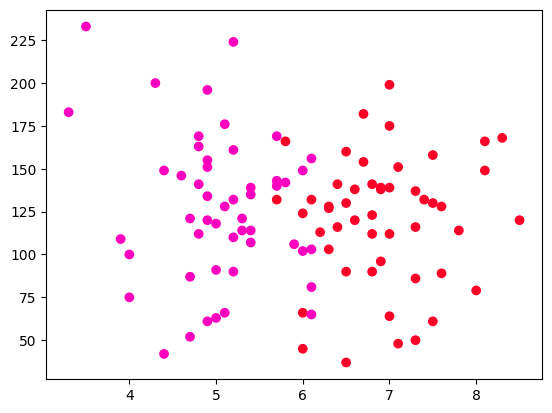

In [6]:
# EDA

import matplotlib.pyplot as plt

plt.scatter(df['cgpa'], df['iq'], c = df['placement'], cmap = 'gist_rainbow_r')

# Feature Selection
# There is no scope of feature selection here

In [7]:
# 1. Extract input and output cols

X = df.iloc[:, 0:2] # input columns
Y = df.iloc[:, -1] # output column

In [8]:
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [9]:
Y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [10]:
# 2. Scale the values

# this will be done after step 3 so that we can see how actually things are getting done

In [11]:
# 3. Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1)

In [12]:
X_train

,cgpa,iq
99,6.2,113.0
88,4.4,149.0
43,6.8,141.0
80,4.9,196.0
53,8.3,168.0
...,...,...
3,7.4,132.0
26,7.0,199.0
78,6.1,81.0
69,8.5,120.0


In [13]:
Y_train

99    1
88    0
43    1
80    0
53    1
     ..
3     1
26    1
78    0
69    1
1     0
Name: placement, Length: 90, dtype: int64

In [14]:
X_test

,cgpa,iq
11,6.9,138.0
74,6.7,154.0
35,6.8,90.0
90,7.3,86.0
61,7.3,137.0
83,7.5,130.0
32,7.0,139.0
97,6.7,182.0
31,3.9,109.0
81,5.4,107.0


In [15]:
Y_test

11    1
74    1
35    1
90    1
61    1
83    1
32    1
97    1
31    0
81    0
Name: placement, dtype: int64

In [16]:
# 2. Scale the values

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)

In [18]:
X_train

array([[ 0.23962555, -0.24937749],
       [-1.35133095,  0.63270009],
       [ 0.76994438,  0.43668285],
       [-0.90939859,  1.78430136],
       [ 2.09574146,  1.09824103],
       [-1.35133095, -1.98903048],
       [-1.17455801,  0.55919362],
       [-2.1468092 ,  2.69088109],
       [-0.90939859, -0.0778624 ],
       [-0.82101212, -0.12686671],
       [ 0.59317144, -0.0778624 ],
       [ 1.38864969,  0.85321948],
       [ 1.0351038 , -1.84201755],
       [ 1.47703616, -0.8374292 ],
       [ 0.0628526 ,  0.63270009],
       [-0.82101212, -1.47448522],
       [-0.64423918, -0.32288395],
       [ 0.32801202,  0.09365268],
       [ 0.0628526 , -1.91552401],
       [ 0.0628526 , -0.51890119],
       [ 1.6538091 , -0.22487533],
       [-0.20230681,  1.12274318],
       [-0.90939859,  0.26516776],
       [ 0.50478496, -0.81292705],
       [ 1.38864969, -1.52348953],
       [-0.5558527 , -0.22487533],
       [-0.82101212, -0.78842489],
       [ 0.76994438, -0.00435594],
       [ 0.41639849,

In [19]:
X_test =  scaler.transform(X_test) 

In [20]:
X_test

array([[ 0.85833085,  0.36317638],
       [ 0.68155791,  0.75521086],
       [ 0.76994438, -0.81292705],
       [ 1.21187674, -0.91093567],
       [ 1.21187674,  0.33867423],
       [ 1.38864969,  0.16715914],
       [ 0.94671732,  0.38767854],
       [ 0.68155791,  1.44127119],
       [-1.79326331, -0.34738611],
       [-0.46746623, -0.39639041]])

In [21]:
# 4. Train the model

# We are going to use logistic regression

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train,Y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [22]:
# 5. Evaluate the model/model selection 

# testing

y_pred = clf.predict(X_test)

In [23]:
Y_test

11    1
74    1
35    1
90    1
61    1
83    1
32    1
97    1
31    0
81    0
Name: placement, dtype: int64

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, y_pred)

1.0

<Axes: >

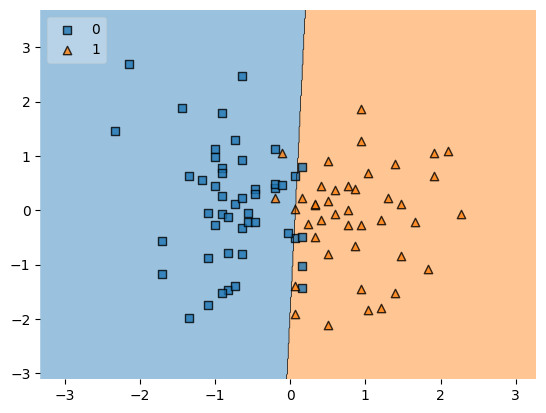

In [26]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, Y_train.values, clf = clf, legend = 2)

In [ ]:
# deployment will be done later

In [31]:
import os
os.getcwd()


'/Users/aditigarg/toy_project'